# Аналитический кейс

Отделом маркетинга был подготовлен список гипотез для увеличения выручки.

**Задачи:**
1. Приоритизировать гипотезы,
2. Запустить A/B-тест,
3. Проанализировать результаты.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

## Часть. Приоритизация гипотез.

В файле */datasets/hypothesis.csv* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Подзадачи:
1. Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Описание данных**

Файл */datasets/hypothesis.csv*.

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Перед началом работы откроем и познакомимся с файлом гипотез.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В файле нет пропусков, типы данных соответсвуют ожидаемым. Приступаем к решению подзадач 1 части.

В названиях колонок видны нарушения стиля-строчные буквы сочетаются с прописными. Переименуем колонки в соответвие требованиям хорошего стиля: Hypothesis → hypothesis, Reach  → reach,  Impact  → impact, Confidence  → confidence, Efforts  → efforts.

In [4]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Применим фреймворк ICE

Фреймворк ICE состоит из трех компонент:

- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

Формула для расчета  ICE:

$$ICE = \frac{Impact * Confidence}{Efforts}$$
<hr style="border: 2px solid blue;" />

In [5]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Выведем на полный тескт приорететной гипотезы согласно критерию ICE.

In [6]:
hypothesis.loc[8]['hypothesis']

'Запустить акцию, дающую скидку на товар в день рождения'

In [7]:
hypothesis.loc[8]

hypothesis    Запустить акцию, дающую скидку на товар в день...
reach                                                         1
impact                                                        9
confidence                                                    9
efforts                                                       5
ICE                                                        16.2
Name: 8, dtype: object

### Применим фреймворк RICE

Фреймворк RICE состоит из четырёх компонент:

- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

Формула для расчета  RICE:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

<hr style="border: 2px solid blue;" />

In [8]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)


,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Выведем на полный тескт приорететной гипотезы согласно критерию RICE.

In [9]:
hypothesis.loc[7]['hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

In [10]:
hypothesis.loc[7]

hypothesis    Добавить форму подписки на все основные страни...
reach                                                        10
impact                                                        7
confidence                                                    8
efforts                                                       5
ICE                                                        11.2
RICE                                                      112.0
Name: 7, dtype: object

Выведем на полный тескт самой неприорететной гипотезы согласно критерию RICE и ICE.

In [11]:
hypothesis.loc[4]['hypothesis']

'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'

In [12]:
hypothesis.loc[4]

hypothesis    Изменить цвет фона главной страницы, чтобы уве...
reach                                                         3
impact                                                        1
confidence                                                    1
efforts                                                       1
ICE                                                         1.0
RICE                                                        3.0
Name: 4, dtype: object

Порядок приоритетных задач согласно критериям ICE и RICE практически полностью разлисается. За исключением гипотезы 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей', которая уверенно занимает последнее место в списке приорететных задач обоих методов, у данной гипотезы крайне низкие показатели impact, confidence, efforts и ниже среднего reach. То есть данное изменение затронет небольшую пользователей, вероятно не повляет на их покупальскую способность, нет уверенности в том что изменение цвета именно увеличит вовлеченность и требует больших затрат.

Согласно критерию **ICE** наиболее приоретеной является гипотеза *'Запустить акцию, дающую скидку на товар в день рождения'*. У это гипотезы хорошие показатели *impact, confidence, efforts* то есть данное есть основания пологать что данное изменение может повлиять на покупательскую способность клиентов, с большой долей вероятности эта акция повлияет именно в положительную сторону и не потребует больших затрат на тестирование. Согласно критерию **RICE** эта гипотеза оказалась в середине, на 5 месте из-за того что она затронет очень небольшой сегмент покупателей. К слову говоря, формулировка гипотезы *'Запустить акцию, дающую скидку на товар в день рождения'* не выглять очень хорошей, потому что в ней не указано какого именно эффекта мы ждем - предположу что это увеличение покупок.

Согласно критерию **RICE** наиболее приоретеной является гипотеза *'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'*. Эта гипотеза оказалась в топе согласно данному критерию, так как имеет максимальный охват пользователей, и в целом неплохие показатели *impact, confidence, efforts* то есть данное есть основания пологать что добавление формы подписок на каждый экран поможет собрать базу данных клиентов, с большой долей вероятности это будет так и не потребует больших затрат на тестирование гипотезы.

## Часть. Анализ A/B-теста

Провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Описание файлов**


*Файл /datasets/orders.csv.* 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


*Файл /datasets/visitors.csv.* 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [13]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [16]:
orders.duplicated().sum()

0

In [17]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [20]:
visitors.duplicated().sum()

0

### Построим график кумулятивной выручки по группам. 

Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов методом drop_duplicates().

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated= datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


Объявим переменную *ordersAggregated*, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

In [22]:
ordersAggregated= datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объявим переменную *visitorsAggregated*, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [23]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge().  Присвойте столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']. Выведите первые 5 строк переменной cumulativeData.

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.
Построим графики кумулятивной выручки по дням по группам.

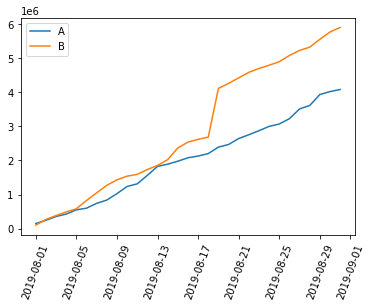

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
degrees = 70
plt.xticks(rotation=degrees)
plt.legend();

В середине теста сегмент В резко вырвался вперед и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы вляют на результаты. При заключительном анализе их нужно удалить.

### Построим график кумулятивного среднего чека по группам.

Вычислим средний чек так: cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']. Построим графики методом plt.plot() с параметрами label='A' и label='B'.

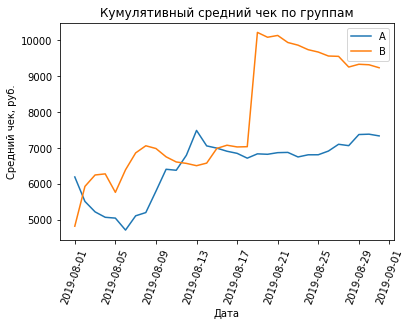

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=degrees)
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек, руб.");

Кумулятивное значение среднего чека так же колебалось, но в тот же период можно отметить резкий рост среднего чека в группе В.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Сохраним в переменной mergedCumulativeRevenue.

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


Постройте график относительно различия кумулятивного среднего чека группы B к группе A.
Добавьте пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

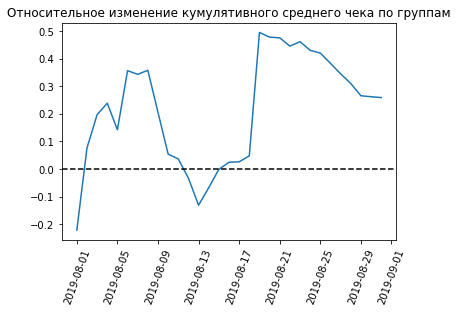

In [28]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=degrees)
plt.title("Относительное изменение кумулятивного среднего чека по группам");


Мы построили график относительного различия в чеке. Результаты значительно и резко менялись в некоторые даты. Видимо, именно тогда произошли аномальные заказы.

**Вывод**  
График различия среднего чека говорит о том, что результаты группы B улучшаются и сейчас почти на 20% лучше.

### Построим график кумулятивной конверсии по группам.

Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.

Построим графики кумулятивной конверсии по дням по группам.

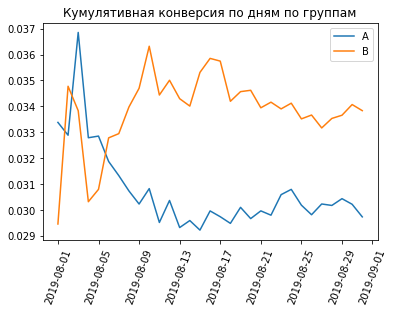

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=degrees)
plt.title("Кумулятивная конверсия по дням по группам");

В начале теста сегмент А имел большую конверсию, но со временем В пошел вверх.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB']. Сохраним в переменной mergedCumulativeConversions.


Построим график относительного различия кумулятивной конверсии группы B к группе A.

Добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.


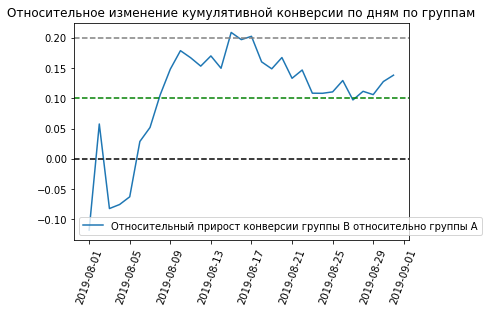

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.xticks(rotation=degrees)
plt.title("Относительное изменение кумулятивной конверсии по дням по группам");

Достаточно быстро В опережает группу А, в середина эксперимента доходит до 10-20% прироста относительно А.

**Вывод** 

График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть  тенденция к улучшению.

### Точечный график количества заказов по пользователям.

In [31]:
ordersByUsers = (
orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['userId', 'orders']

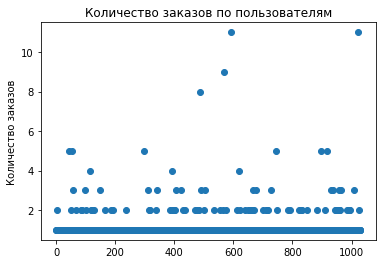

In [32]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Количество заказов по пользователям")
plt.ylabel("Количество заказов");

Пользователей сделавших больше 3 заказов мало, они могут быть аномальными. Для того что бы опредлить аномальные заказы нужно посчитать выборочные перцентили.

### 95-й и 99-й перцентили количества заказов на пользователя. 

Выберем границу для определения аномальных пользователей по пользователям методом np.percentile().

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершили больше 2 заказов и не более 1% пользователей совершили больше 4 заказов.

### точечный график стоимостей заказов.

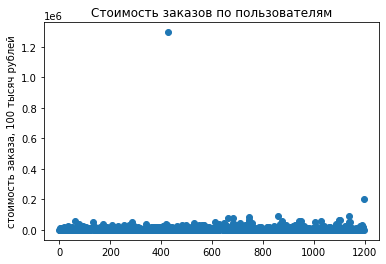

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Стоимость заказов по пользователям")
plt.ylabel("стоимость заказа, 100 тысяч рублей");

Заказов стоимостью больше 100 тыс рублей практически нет, заказ в интернет магазине на сумму больше чем 12 млн выглядит аномальным выбросом.

### 95-й и 99-й перцентили стоимости заказов. 

Выберем границу для определения аномальных заказов по выручке с заказов по пользователям методом np.percentile().

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей чек дороже 28 тыс рублей и не более 1% пользователей дороже 59 тыс рублей.

###  Cтатистическая значимость различий в конверсии между группами по «сырым» данным.

Создадим таблицу количество пользователей в выбранную дату в группе A и В;

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [37]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Создадим таблицу количество пользователей до выбранной даты включительно в группе A и В;

In [38]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [39]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


Создадим таблицу c количеством заказов и суммарной выручкой в выбранную дату в группах A и В.

In [40]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [41]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


Создадим таблицу с суммарным числом заказов и суммарной выручкой до выбранной даты включительно в группах A и В.

In [42]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [43]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Создадим таблицу data со следующим устройством:

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [44]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


создадим переменные
ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Возьмите код из урока в качестве примера.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Посчитаем статистическую значимость различия конверсии по результатам двух недель теста при помощи теста Манна-Уитни. И вычислим и выведем относительное различие в конверсии между группами.

**Нулевая гипотеза для теста** Манна-Уитни - статистически значимых различий в конверсии между группами нет,
**Альтернативная гипотеза для теста** - есть статистически значимые различия в конверсии между группами.



In [47]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.01679
0.138


In [48]:
print(f"p-value: {stats.mannwhitneyu(sampleA, sampleB)[1]:.2}")

p-value: 0.017


*p-value* меньше 0,05 поэтому нулевую гипотезу отвергаем. Анализ "сырых данных" показал что в различиях конверсии **различия в конверсии статистически значимы**. Относительный прирост конверсии группы В к конверсии группы А составил 13,8%.

In [49]:
# КОД РЕВЬЮВЕРА
print(f"Относительно изменение конверсии: {sampleB.mean() / sampleA.mean() - 1:.1%}")

Относительно изменение конверсии: 13.8%


<hr style="border: 2px solid orange;" />

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

**Нулевая гипотеза**: различий в среднем чеке между группами нет. 

**Альтернативная гипотеза**: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

А ещё найдём относительные различия в среднем чеке между группами:

In [50]:
print(f"p-value: {stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]:.2}")
print(f"Различие в среднем чеке групп: {orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1:.1%}")

p-value: 0.73
Различие в среднем чеке групп: 25.9%


*p-value* больше 0,05 поэтому нулевую гипотезу принимаем. Анализ "сырых данных" показал что статистически достоверных различий в среднем чеке между группами нет. Но относительный прирост среднего чека группы В к среднему чеку группы А составил аж 25,9%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным. 

 *95-й и 99-й перцентили* **средних чеков** равны 28000 и 58233.2 рублям. 
 *95-й и 99-й перцентили* **числа заказов** на одного пользователя равны 2 и 4 заказам на пользователя.

Примим за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Сделаем срезы пользователей с числом заказов больше 3 — *usersWithManyOrders* и пользователей, совершивших заказы дороже 28 000 — *usersWithExpensiveOrders*. Объединим их в таблице *abnormalUsers*, удалим дубликаты, отсортируем по возрастанию.
Выведем первые 5 строк переменной *abnormalUsers*.

In [51]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64

**Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей.**

Создадим переменные *sampleAFiltered* и *sampleBFiltered*, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

In [52]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Выведем *p-value* для сравнения конверсии между очищенными группами. Выведем относительный прирост конверсии очищенной группы B, округлив до трёх знаков после запятой.


**Нулевая гипотеза для теста** Манна-Уитни - статистически значимых различий в конверсии между группами нет,
**Альтернативная гипотеза для теста** - есть статистически значимые различия в конверсии между группами.

In [53]:
print(f"p-value: {stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]:.2}")
print(f"Относительно изменение конверсии: {sampleBFiltered.mean()/sampleAFiltered.mean()-1:.1%}")

p-value: 0.018
Относительно изменение конверсии: 14.8%


Как и случае с сырыми данными статистическая значимость достигнута. Группа В лучше группы А. Относительный прирост конверсии группы В к конверсии группы А составил 14,8% (даже больше чем с сырыми данными - 13,8%).

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

**Нулевая гипотеза**: различий в среднем чеке между группами нет. 

**Альтернативная гипотеза**: различия в среднем чеке между группами есть.

In [54]:
print("p-value:"
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Различие в среднем чеке:"
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:0.977
Различие в среднем чеке:-0.017


P-value увеличился еще больше, и разница между сегментами стала отрицательной -1,7%.

Общие выводы по результатам теста не изменились

### Вывод и решение по результатам теста.

Имеющиеся факты:
- Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего чека говорит о том, что результаты группы B улучшаются и сейчас почти на 20% лучше. График различия среднего чека колеблется, делать из этого графика определённые выводы нельзя.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть  тенденция к улучшению.

Мы проверяли гипотезу *"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".* Она не предполагала увеличение среднего чека с одного клиента.

**Вывод**

Остановить тест, зафиксировать победу группы В , признать его успешным и перейти к проверке следующей гипотезы.